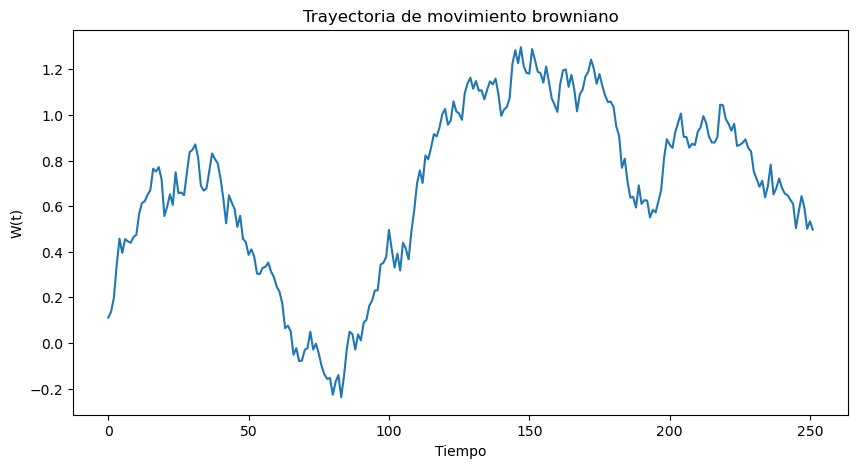

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

T = 1
n = 252
dt = T/n

increments = np.random.normal(0, np.sqrt(dt), size=n)
W = np.cumsum(increments)

plt.figure(figsize=(10,5))
plt.plot(W)
plt.title("Trayectoria de movimiento browniano")
plt.xlabel("Tiempo")
plt.ylabel("W(t)")
plt.show()

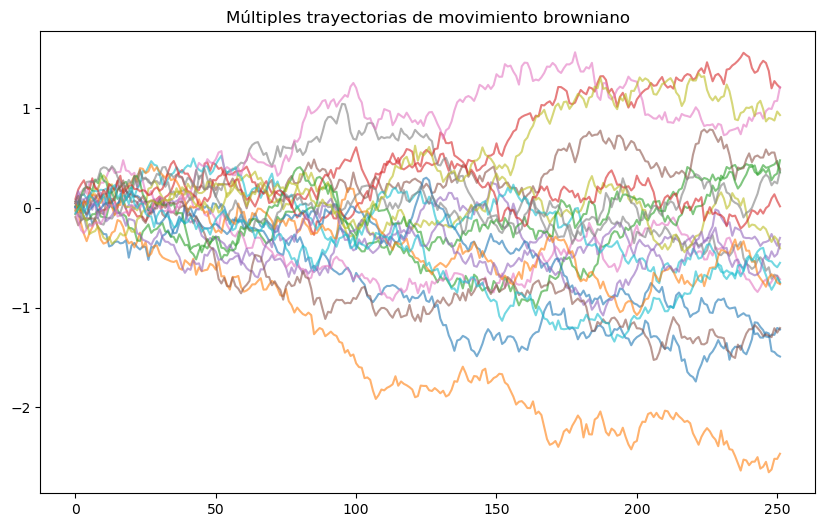

In [2]:
plt.figure(figsize=(10,6))

for _ in range(20):
    increments = np.random.normal(0, np.sqrt(dt), size=n)
    W = np.cumsum(increments)
    plt.plot(W, alpha=0.6)

plt.title("Múltiples trayectorias de movimiento browniano")
plt.show()

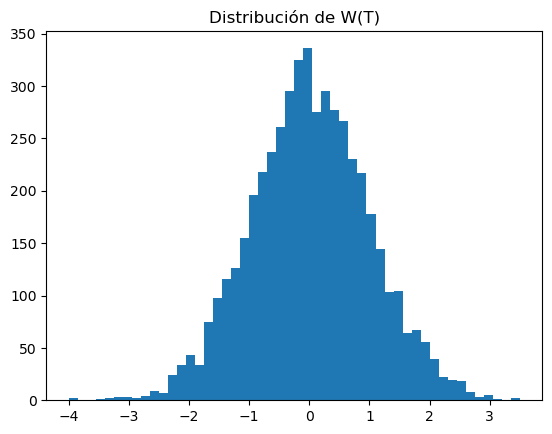

In [3]:
n_sim = 5000
final_values = []

for _ in range(n_sim):
    increments = np.random.normal(0, np.sqrt(dt), size=n)
    final_values.append(np.sum(increments))

plt.hist(final_values, bins=50)
plt.title("Distribución de W(T)")
plt.show()

## Parte 1 — Simulación del proceso

In [6]:
import numpy as np
np.random.seed(0)
Ts = [0.25, 0.5, 1, 2]
n_steps = 252
n_sim = 5000
finals = {}
for T in Ts:
    dt = T / n_steps 
    increments = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=(n_sim, n_steps))
    W_T = increments.sum(axis=1)
    finals[T] = W_T

## Parte 2 — Visualización

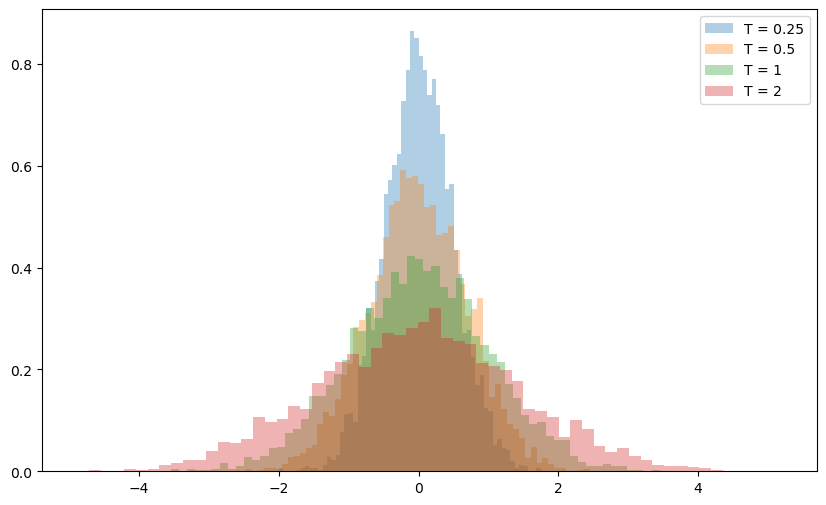

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bins = 60

for T in Ts:
    plt.hist(finals[T], bins=bins, alpha=0.35, density=True, label=f"T = {T}")

plt.legend()
plt.show()

## Parte 3 — Análisis cuantitativo

In [9]:
import pandas as pd

rows = []

for T in Ts:
    W_T = finals[T]
    rows.append({
        "T": T,
        "Media empírica": W_T.mean(),
        "Varianza empírica": W_T.var(ddof=1),
        "Desv. estándar empírica": W_T.std(ddof=1)
    })

tabla = pd.DataFrame(rows)
print(tabla.round(6))

      T  Media empírica  Varianza empírica  Desv. estándar empírica
0  0.25        0.009342           0.240786                 0.490699
1  0.50       -0.006869           0.492818                 0.702010
2  1.00        0.010157           0.993101                 0.996544
3  2.00       -0.011131           2.040496                 1.428459


## Parte 4 — Preguntas de análisis

**1. ¿Cómo cambia la dispersión de la distribución al aumentar el horizonte temporal?**

La dispersión aumenta conforme crece el horizonte temporal, las distribuciones se vuelven más anchas, indicando mayor incertidumbre en el valor final del proceso.

**2. ¿La media del proceso depende del tiempo?**

No. La media empírica se mantiene cercana a cero para todos los horizontes, lo cual coincide con la propiedad del movimiento browniano estándar.

**3. ¿Qué relación observas entre la varianza y el tiempo?**

La varianza aumenta conforme pasa el tiempo, y lo hace de manera aproximadamente proporcional: a horizontes más largos, la dispersión de los resultados es mayor.

**4. Si el horizonte temporal se cuadruplica, ¿qué ocurre aproximadamente con la desviación estándar?**

La desviación estándar aumenta, pero no en la misma proporción que el tiempo, al cuadruplicar el horizonte, la dispersión se incrementa aproximadamente al doble.

**5. ¿Qué implicaciones tiene este comportamiento para el riesgo financiero a distintos horizontes?**

El riesgo crece conforme el horizonte temporal se alarga, ya que los posibles resultados se vuelven más dispersos, lo que implica mayor incertidumbre en inversiones de largo plazo frente a las de corto plazo.